In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# Import Mall Customer Data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv', index_col="CustomerID")

# Data Exploration

In [2]:
# first 10 rows of column
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
# returns first 5 data points
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Initial Data Exploration
The data is complete and there are no nulls

### Data Collection Questions
The biggest glaring question is how is the spending score calculated? What factors are taken into account? Items bought? Time shopping at mall? Diveristy of items bought? Average amount spent per item?

Some questions I would like to know aboutthe data to explore possible biases:
1. What time of the day was the data collected? There could be a bias towards people with certain jobs or lifestyles if the data was collected at a specific time or day.
2. How was the data collected? There can be self selection bias if opting in to the survey was optional (i.e. a QR code on the receipt).
3. Where was the data collected: There is also a possibility of bias if the data was collected in front of a specific store (i.e. only collecting data in front of a technology store)

### More Data
In a hypothetical follow-up data collection, I am curious to explore a couple more features.
1. Family? Single? Kids?
2. What items were bought? (i.e. tech, clothing ...)
3. What time of day were they at the mall?


# Data Visualization

## Histogram
Testing Histogram plot with different bucket sizes to explore distribution of data 

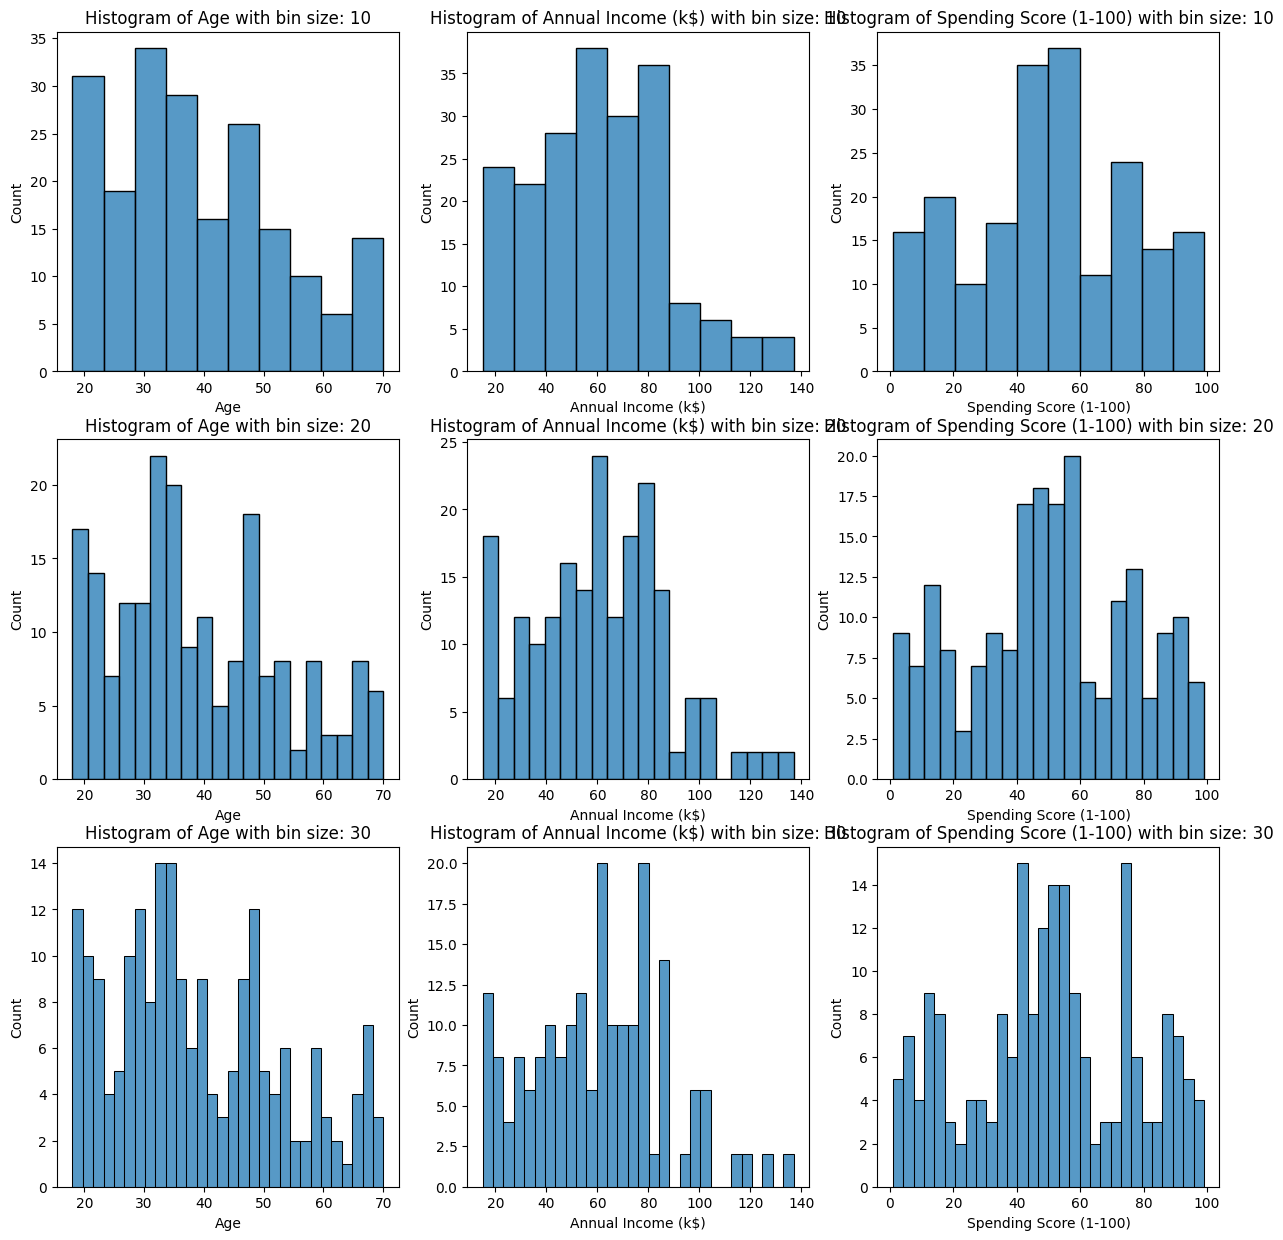

In [8]:
plt.figure(1,figsize=(15,15))
columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
for i,x in enumerate(columns):
    bin_sizes = [10, 20, 30]
    for n,b in enumerate(bin_sizes):
        plt.subplot(len(bin_sizes), len(columns), i+1+(n*3))
        sns.histplot(df[x] , bins = b)
        plt.title('Histogram of {} with bin size: {}'.format(x, b))
plt.show()

    

## Scatterplot
Explore relation between categories with scatter plot by plotting with regression line and plotting with distinguishing colors for genders
- we see no gender patterns
- only noticable relation is a slight negative correlation between age and spending score

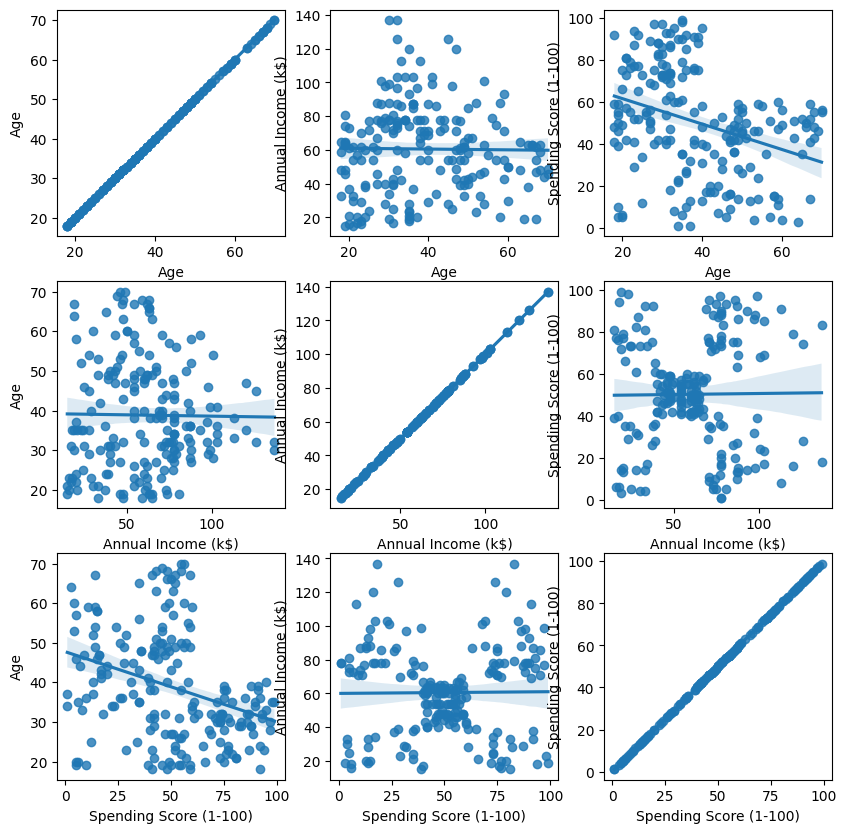

In [9]:
plt.figure(1 , figsize = (10, 10))
columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
n = 0
for x in columns:
    for y in columns:
        n+=1
        plt.subplot(len(columns), len(columns), n)
        sns.regplot(x = x, y = y, data = df)
plt.show()

In [10]:
columns = ['Age' , 'Annual Income (k$)']

for x in columns:
    lm = LinearRegression().fit(df[[x]], df['Spending Score (1-100)'])
    print(f'{x} vs Spending Score (1-100)')
    print(f'Intercept: {lm.intercept_}')    
    print(f'Coefficient: {lm.coef_[0]}\n')

Age vs Spending Score (1-100)
Intercept: 73.70119104335399
Coefficient: -0.6049212623771937

Annual Income (k$) vs Spending Score (1-100)
Intercept: 49.61035766442925
Coefficient: 0.009736498275606803



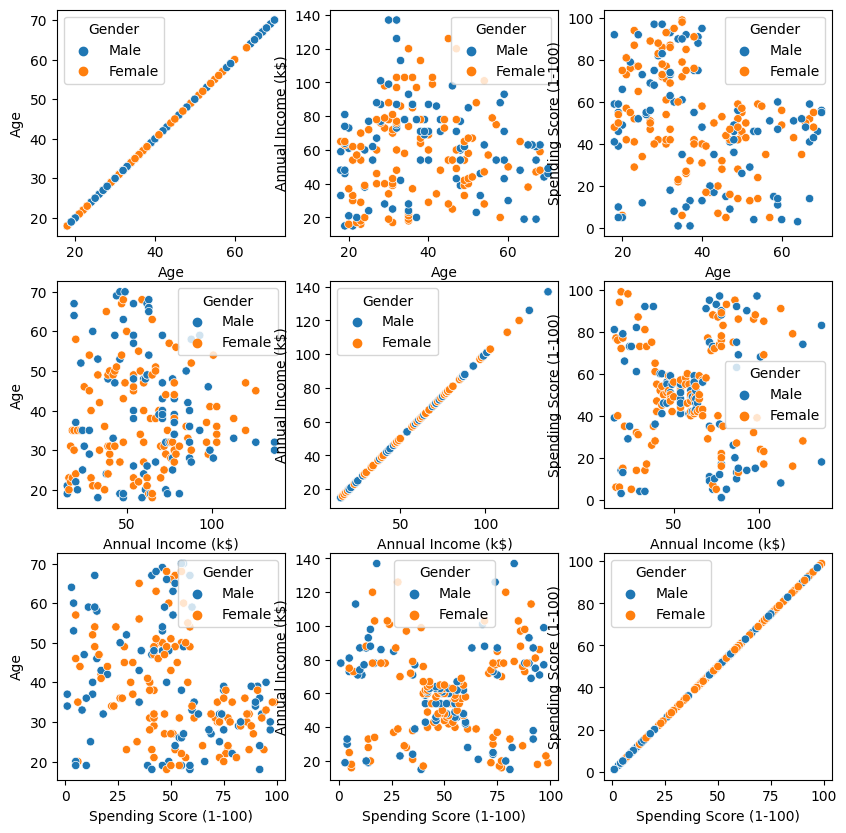

In [11]:
plt.figure(1 , figsize =  (10, 10))
columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']
n = 0
for x in columns:
    for y in columns:
        n+=1
        plt.subplot(len(columns), len(columns), n)
        sns.scatterplot(x = x, y = y, hue = 'Gender', data = df)
plt.show()

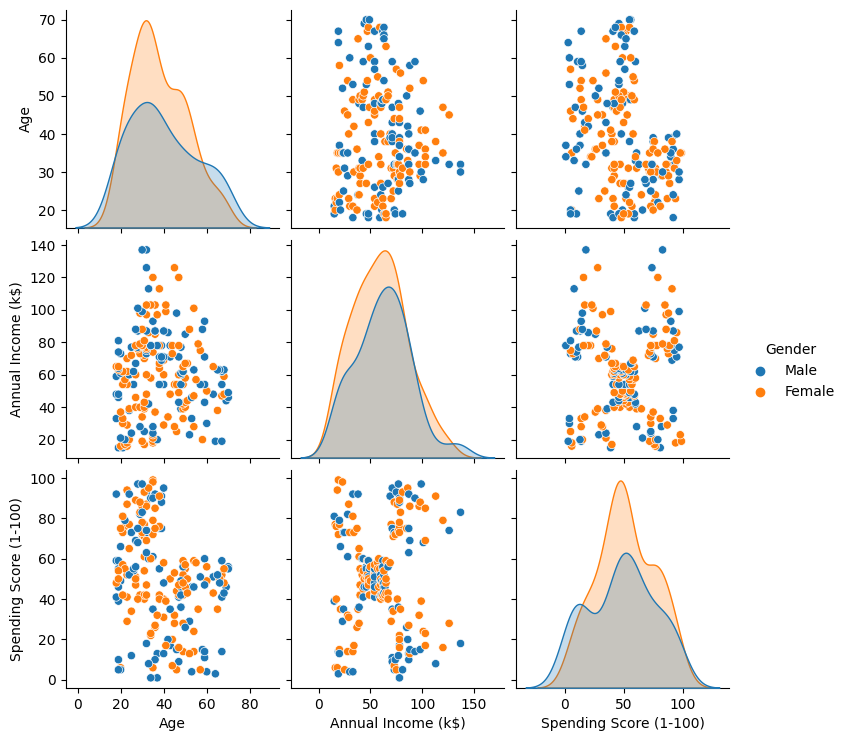

In [12]:
# plt.figure(1 , figsize = (10, 10))
columns = ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)', 'Gender']
sns.pairplot(df[columns], hue='Gender')
plt.show()

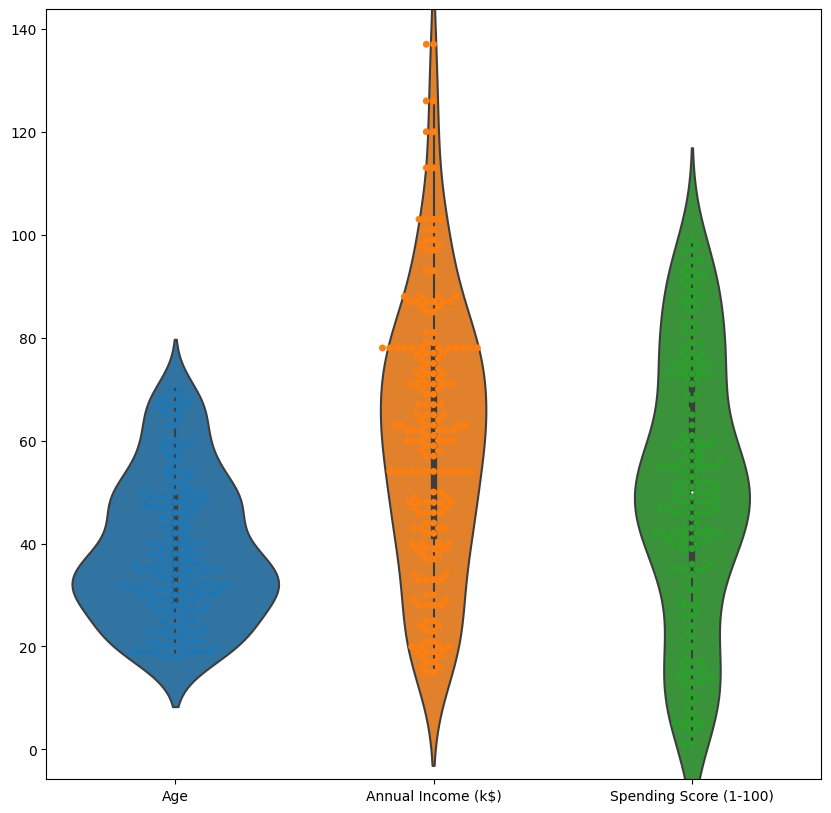

In [13]:
plt.figure(1 , figsize = (10,10))
sns.violinplot(data = df)
sns.swarmplot(data = df)
plt.show()

# K-Means Clustering

## Age vs Spending Score

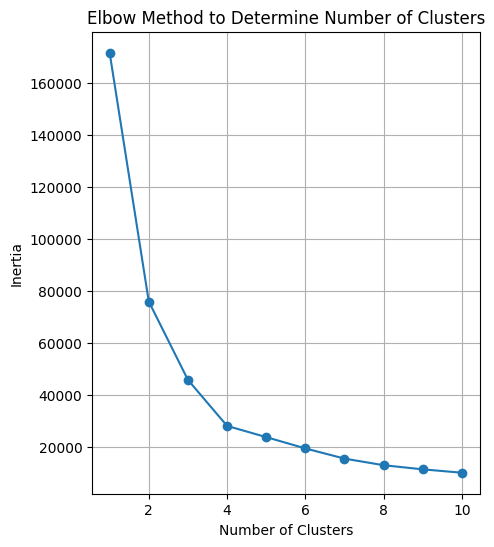

In [14]:
X_age = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

# distance between data points and centroids
inertia = []

for n in range(1, 11):
    km = KMeans(n_clusters=n, 
                n_init=10, # number of times kmenas runs with randomized centroid seeds
               ).fit(X_age)
    inertia.append(km.inertia_)

plt.figure(1 , figsize = (5, 6))
plt.plot(np.arange(1 , 11) , inertia, '-o')
plt.title('Elbow Method to Determine Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

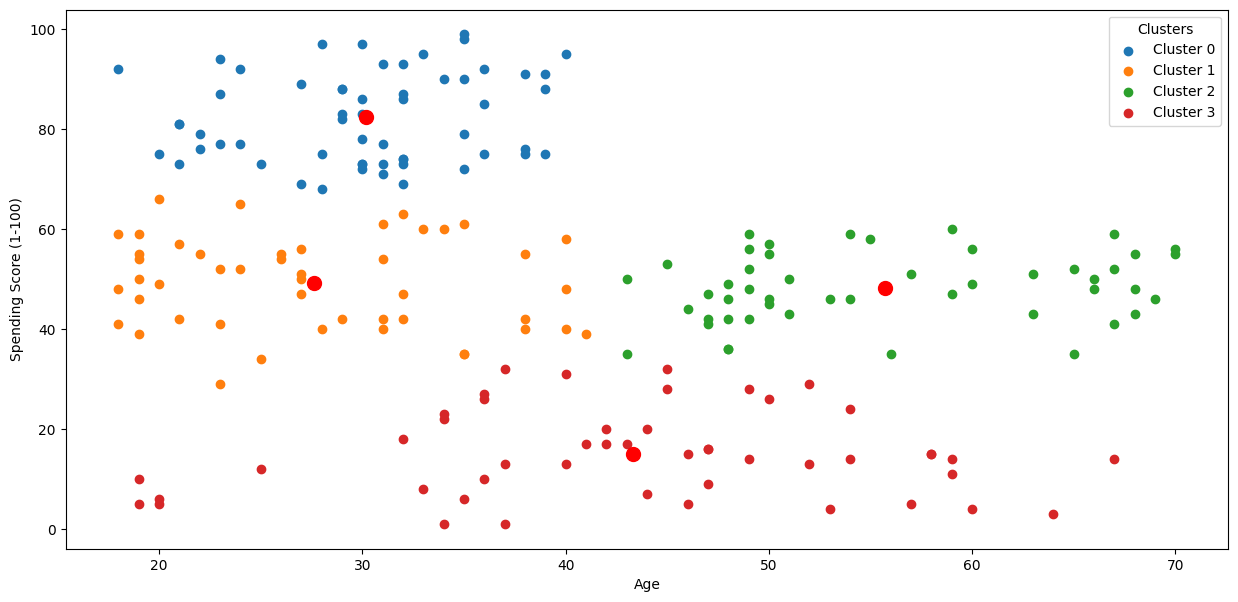

In [15]:
km = KMeans(n_clusters=4, n_init=10).fit(X_age)

labels = km.labels_
centroids = km.cluster_centers_

plt.figure(1 , figsize = (15 , 7))
for cluster in np.unique(labels):
    cluster_points = df[labels == cluster]
    plt.scatter(cluster_points['Age'], cluster_points['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.scatter(x=centroids[:,0], y=centroids[:,1], s = 100, c='red')
plt.legend(title="Clusters")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [16]:
for cluster in np.unique(labels):
    min_score = df[labels == cluster]['Spending Score (1-100)'].min()
    if min_score > 60:
        print(f"Cluster {cluster} Spending Score and Age Range")
        print(f"   Spending Score: {min_score} {df[labels == cluster]['Spending Score (1-100)'].max()}")
        print(f"   Age Range: {df[labels == cluster]['Age'].min()} {df[labels == cluster]['Age'].max()}")

Cluster 0 Spending Score and Age Range
   Spending Score: 68 99
   Age Range: 18 40


We will note the clusters with high spending scores for now and come back to it later.

## Annual Income vs Spending Score

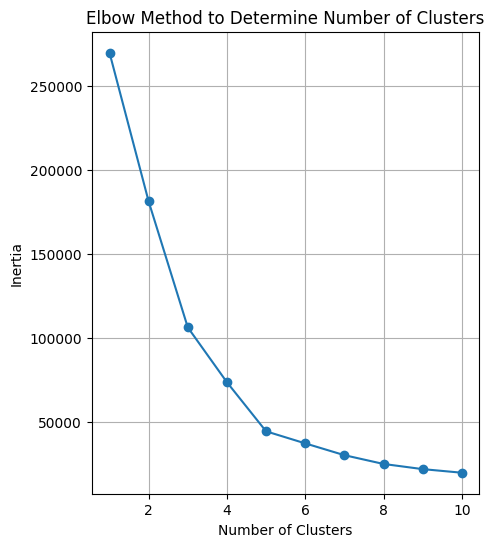

In [17]:
X_income = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# distance between data points and centroids
inertia = []

for n in range(1, 11):
    km = KMeans(n_clusters=n, 
                n_init=10, # number of times kmenas runs with randomized centroid seeds
               ).fit(X_income)
    inertia.append(km.inertia_)

plt.figure(1 , figsize = (5, 6))
plt.plot(np.arange(1 , 11) , inertia, '-o')
plt.title('Elbow Method to Determine Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

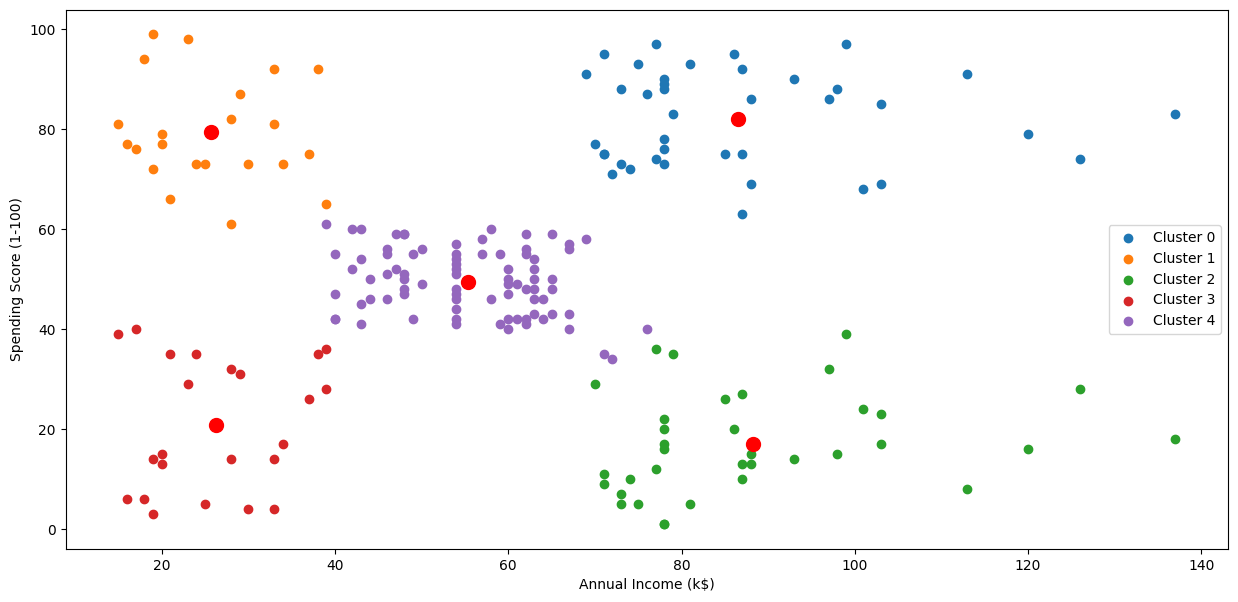

In [18]:
km = KMeans(n_clusters=5, n_init=10).fit(X_income)

labels = km.labels_
centroids = km.cluster_centers_

plt.figure(1 , figsize = (15 , 7))
for cluster in np.unique(labels):
    cluster_points = df[labels == cluster]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.scatter(x=centroids[:,0], y=centroids[:,1], s = 100, c='red')
plt.legend()
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [19]:
for cluster in np.unique(labels):
    min_score = df[labels == cluster]['Spending Score (1-100)'].min()
    if min_score > 60:
        print(f"Cluster {cluster} Spending Score and Annual Income Range")
        print(f"   Spending Score: {min_score} {df[labels == cluster]['Spending Score (1-100)'].max()}")
        print(f"   Annual Income Range: {df[labels == cluster]['Annual Income (k$)'].min()} {df[labels == cluster]['Annual Income (k$)'].max()}")

Cluster 0 Spending Score and Annual Income Range
   Spending Score: 63 97
   Annual Income Range: 69 137
Cluster 1 Spending Score and Annual Income Range
   Spending Score: 61 99
   Annual Income Range: 15 39


We will note the clusters with high spending scores for now and come back to it later.

## Age vs Annual Income vs Spending Score

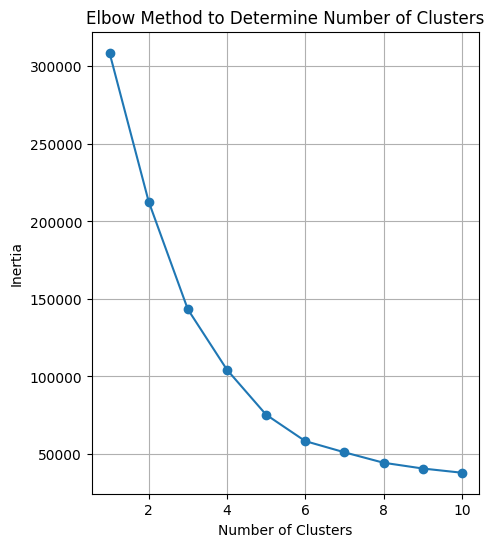

In [20]:
X = df[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# distance between data points and centroids
inertia = []

for n in range(1, 11):
    km = KMeans(n_clusters=n, 
                n_init=10, # number of times kmenas runs with randomized centroid seeds
               ).fit(X)
    inertia.append(km.inertia_)

plt.figure(1 , figsize = (5, 6))
plt.plot(np.arange(1 , 11) , inertia, '-o')
plt.title('Elbow Method to Determine Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

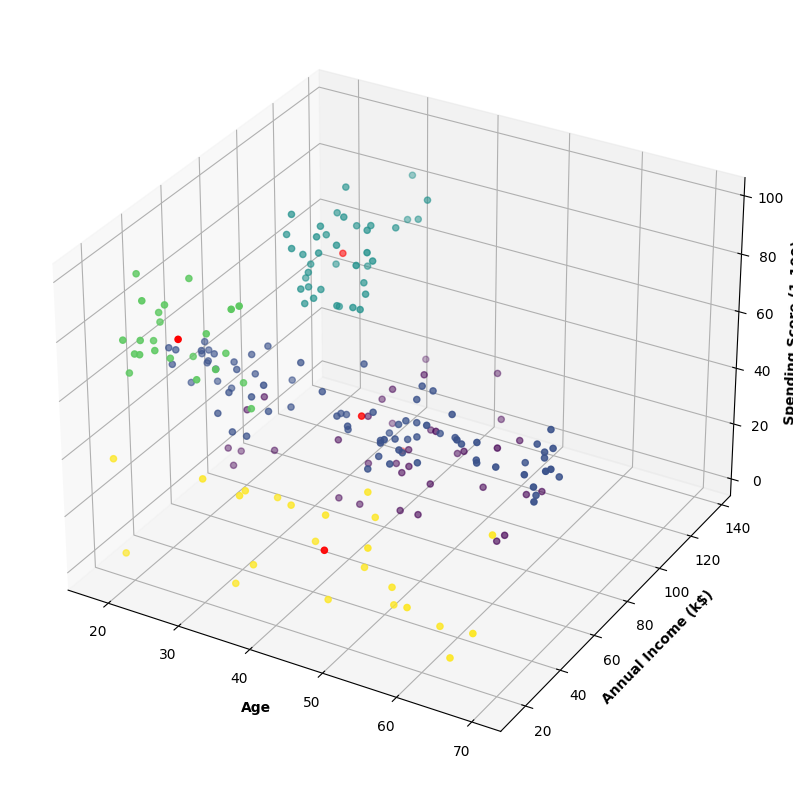

In [21]:
km = KMeans(n_clusters=5, n_init=10).fit(X)

labels = km.labels_
centroids = km.cluster_centers_

plt.figure(1 , figsize = (10 , 10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels)
ax.scatter3D(centroids[:,0], centroids[:,1], centroids[:,2], c='red')

ax.set_xlabel('Age', fontweight ='bold') 
ax.set_ylabel('Annual Income (k$)', fontweight ='bold') 
ax.set_zlabel('Spending Score (1-100)', fontweight ='bold')

plt.show()

In [22]:
for cluster in np.unique(labels):
    min_score = df[labels == cluster]['Spending Score (1-100)'].min()
    if min_score > 60:
        print(f"Cluster {cluster} Spending Score and Annual Income Range")
        print(f"   Spending Score: {min_score} {df[labels == cluster]['Spending Score (1-100)'].max()}")
        print(f"   Annual Income Range: {df[labels == cluster]['Annual Income (k$)'].min()} {df[labels == cluster]['Annual Income (k$)'].max()}")
        print(f"   Age Range: {df[labels == cluster]['Age'].min()} {df[labels == cluster]['Age'].max()}")        

Cluster 2 Spending Score and Annual Income Range
   Spending Score: 63 97
   Annual Income Range: 69 137
   Age Range: 27 40
Cluster 3 Spending Score and Annual Income Range
   Spending Score: 61 99
   Annual Income Range: 15 39
   Age Range: 18 35


# Summary and Takeaways

While there are a lot of questions about the data collection methods, and many more factors I would like to explore. We can start to target Ages 18-40. In this age group there are 2 groups that stand out. Low income (15k-39k) high spending score, and high income high spending score (69k-137k). However, there is also a clear low spending score cluster for bother of these salary ranges. So for next steps, I would like to collect more data to investigate what sets these groups apart, and how to target the high spending score groups.